In [1]:
import librosa
import librosa.display
import IPython.display as idp
import matplotlib.pyplot as plt
import numpy as np


In [35]:
#load the audio file
audio_file = 'G:\\Users\\waqas\\chunkedData\\falling\\fall1\\chunk0.wav'

In [36]:
idp.Audio(audio_file)

In [23]:
signal, sr = librosa.load(audio_file)
signal.shape

(22050,)

In [24]:
#extract the MFCCs
mfcc = librosa.feature.mfcc(signal, n_mfcc=13, sr=sr)
mfcc.shape

(13, 44)

In [ ]:
#calculate the delta and delta2 of MFCCs
delta_mfcc = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

In [ ]:
delta_mfcc.shape

In [ ]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfcc,
                        x_axis="time",
                        sr=sr)
plt.colorbar(format="%+2f")
plt.show()

In [ ]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfcc,
                        x_axis="time",
                        sr=sr)
plt.colorbar(format="%+2f")
plt.show()

In [ ]:
comprehensive_mfcc = np.concatenate((mfcc, delta_mfcc, delta2_mfcc))

In [ ]:
comprehensive_mfcc.shape

In [ ]:
plt.figure(figsize=(25,10))
librosa.display.specshow(comprehensive_mfcc,
                        x_axis="time",
                        sr=sr)
plt.colorbar(format="%+2f")
plt.show()

In [ ]:
# STFT converts signal such that we can know the amplitude of given frequency at a given time.
X = librosa.stft(signal)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

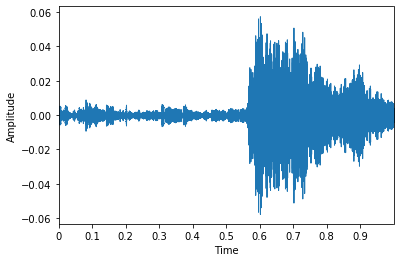

In [37]:
#getting the sound ready for the neural network
signal, sr = librosa.load(audio_file)
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

Text(0, 0.5, 'Magnitude')

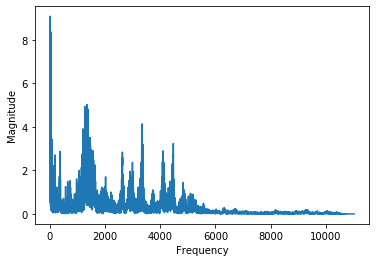

In [26]:
# fft -> spectrum
#fft-> first forier transformation
#to generate the spectrum from the wav signal or file
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

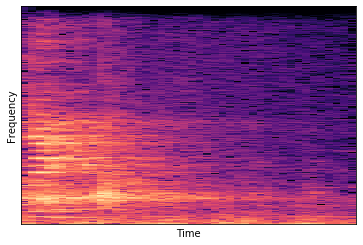

In [27]:
#stft -> spectogram
#stft -> short time forier transformation
n_fft = 2048
hop_length = 512

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectogram = np.abs(stft)

log_spectogram = librosa.amplitude_to_db(abs(stft))

librosa.display.specshow(log_spectogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
#plt.colorbar()
plt.show()

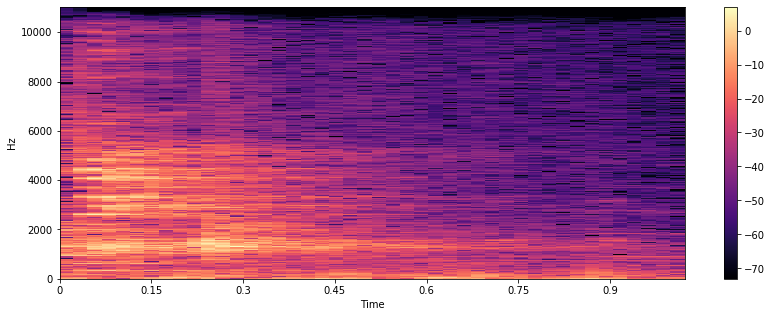

In [28]:
#both are the same
#n_ftt is the window size
# hop_length is the hop length
n_ftt = 2048
hop_length = 512
X = librosa.core.stft(signal, hop_length=None, n_fft=n_ftt, 
                      win_length=None, window='hann', center=True, pad_mode='reflect')
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

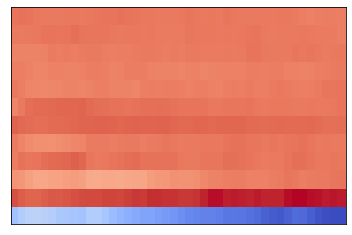

In [34]:
#MFCCs
#important features like formant and spectural envolope
n_ftt = 2048
hop_length = 512
mfcc = librosa.feature.mfcc(signal, n_fft=n_ftt, hop_length=hop_length, n_mfcc=12)
librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length)
plt.savefig('Mfcc.png', bbox_inches='tight')

In [20]:
from tensorflow.keras.preprocessing import image
img_path = 'mfcc.png'
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [14]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from models.resnet import resnet_34
#import config
#from prepare_data import generate_datasets
import math


def get_model():
    model = resnet_34()
    model.build(input_shape=(1, 244, 244, 3))
    model.summary()
    return model


if __name__ == '__main__':
    
    # create model
    model = get_model()
    
    predictions = model(img, training=True)
    
    print('end')
    print(predictions.shape)

Model: "res_net_type_i"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  9472      
_________________________________________________________________
batch_normalization (BatchNo multiple                  256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
sequential (Sequential)      multiple                  223104    
_________________________________________________________________
sequential_1 (Sequential)    multiple                  1119872   
Total params: 1,352,704
Trainable params: 1,349,504
Non-trainable params: 3,200
_________________________________________________________________
end
(1, 28, 28, 128)
